In [62]:
import pandas as pd
import plotly.express as px
import numpy as np

In [63]:
dfList = []

In [64]:
for x in range(2001, 2020):
    df = pd.read_csv(f"dl/raw/INMET_CO_DF_A001_BRASILIA_01-01-{x}_A_31-12-{x}.CSV", sep=";", encoding="latin1", skiprows=8, decimal=",")
    dfList.append(df)

In [65]:
for item in dfList:
    print(item.shape)

(8760, 20)
(8760, 20)
(8760, 20)
(8784, 20)
(8760, 20)
(8760, 20)
(8760, 20)
(8784, 20)
(8760, 20)
(8760, 20)
(8760, 20)
(8784, 20)
(8760, 20)
(8760, 20)
(8760, 20)
(8784, 20)
(8760, 20)
(8760, 20)
(8760, 20)


In [66]:
concatenated_df = pd.concat(dfList)
print(concatenated_df)

     DATA (YYYY-MM-DD) HORA (UTC)  PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
0           2001-01-01      00:00                               0.8   
1           2001-01-01      01:00                               3.4   
2           2001-01-01      02:00                               1.4   
3           2001-01-01      03:00                               0.0   
4           2001-01-01      04:00                               0.0   
...                ...        ...                               ...   
8755               NaN        NaN                               0.0   
8756               NaN        NaN                               1.6   
8757               NaN        NaN                               0.2   
8758               NaN        NaN                               0.0   
8759               NaN        NaN                               0.0   

      PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  \
0                                                 886.0       
1                    

In [67]:
concatenated_df.shape

(166536, 22)

In [68]:
concatenated_df.head(25)

,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),...,TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19,Data,Hora UTC
0,2001-01-01,00:00,0.8,886.0,886.0,885.7,-9999.0,20.1,19.0,20.7,...,18.9,93.0,91.0,93.0,167.0,5.3,2.8,NaN,NaN,NaN
1,2001-01-01,01:00,3.4,886.1,886.1,886.0,-9999.0,19.8,19.0,20.0,...,18.9,96.0,94.0,95.0,187.0,4.0,0.3,NaN,NaN,NaN
2,2001-01-01,02:00,1.4,886.2,886.4,886.1,-9999.0,19.9,19.1,20.0,...,19.0,96.0,95.0,95.0,288.0,1.1,0.0,NaN,NaN,NaN
3,2001-01-01,03:00,0.0,885.8,886.3,885.8,-9999.0,19.8,19.0,20.0,...,18.5,95.0,93.0,95.0,346.0,0.9,0.2,NaN,NaN,NaN
4,2001-01-01,04:00,0.0,885.4,885.9,885.4,-9999.0,19.4,18.9,20.0,...,18.8,97.0,95.0,97.0,305.0,2.8,1.8,NaN,NaN,NaN
5,2001-01-01,05:00,0.0,884.6,885.5,884.6,-9999.0,19.2,18.5,19.4,...,18.5,97.0,95.0,95.0,349.0,3.3,2.0,NaN,NaN,NaN
6,2001-01-01,06:00,0.0,884.5,884.6,884.4,-9999.0,19.1,18.4,19.2,...,18.3,96.0,95.0,96.0,353.0,3.5,2.1,NaN,NaN,NaN
7,2001-01-01,07:00,0.0,884.6,884.6,884.3,-9999.0,18.9,18.4,19.1,...,18.2,97.0,96.0,97.0,359.0,3.5,0.9,NaN,NaN,NaN
8,2001-01-01,08:00,3.6,885.0,885.0,884.6,-9999.0,18.9,18.4,18.9,...,18.2,97.0,97.0,97.0,98.0,3.1,0.9,NaN,NaN,NaN
9,2001-01-01,09:00,12.0,885.6,885.6,885.0,1.0,18.8,18.2,19.0,...,18.2,97.0,96.0,97.0,215.0,1.8,0.6,NaN,NaN,NaN


In [69]:
concatenated_df = concatenated_df.drop(['DATA (YYYY-MM-DD)', 'HORA (UTC)', 'RADIACAO GLOBAL (KJ/m²)', 'Unnamed: 19', 'Data', 'Hora UTC'], axis=1)


In [70]:
concatenated_df.head(10)

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,0.8,886.0,886.0,885.7,20.1,19.0,20.7,20.1,19.4,18.9,93.0,91.0,93.0,167.0,5.3,2.8
1,3.4,886.1,886.1,886.0,19.8,19.0,20.0,19.7,19.1,18.9,96.0,94.0,95.0,187.0,4.0,0.3
2,1.4,886.2,886.4,886.1,19.9,19.1,20.0,19.8,19.2,19.0,96.0,95.0,95.0,288.0,1.1,0.0
3,0.0,885.8,886.3,885.8,19.8,19.0,20.0,19.7,19.1,18.5,95.0,93.0,95.0,346.0,0.9,0.2
4,0.0,885.4,885.9,885.4,19.4,18.9,20.0,19.4,19.3,18.8,97.0,95.0,97.0,305.0,2.8,1.8
5,0.0,884.6,885.5,884.6,19.2,18.5,19.4,19.2,18.9,18.5,97.0,95.0,95.0,349.0,3.3,2.0
6,0.0,884.5,884.6,884.4,19.1,18.4,19.2,19.0,18.5,18.3,96.0,95.0,96.0,353.0,3.5,2.1
7,0.0,884.6,884.6,884.3,18.9,18.4,19.1,18.8,18.4,18.2,97.0,96.0,97.0,359.0,3.5,0.9
8,3.6,885.0,885.0,884.6,18.9,18.4,18.9,18.7,18.4,18.2,97.0,97.0,97.0,98.0,3.1,0.9
9,12.0,885.6,885.6,885.0,18.8,18.2,19.0,18.8,18.4,18.2,97.0,96.0,97.0,215.0,1.8,0.6


In [71]:
concatenated_df.rename(columns={'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': 'PRECIPITACAO'}, inplace=True)

In [72]:
concatenated_df.head(10)

,PRECIPITACAO,"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,0.8,886.0,886.0,885.7,20.1,19.0,20.7,20.1,19.4,18.9,93.0,91.0,93.0,167.0,5.3,2.8
1,3.4,886.1,886.1,886.0,19.8,19.0,20.0,19.7,19.1,18.9,96.0,94.0,95.0,187.0,4.0,0.3
2,1.4,886.2,886.4,886.1,19.9,19.1,20.0,19.8,19.2,19.0,96.0,95.0,95.0,288.0,1.1,0.0
3,0.0,885.8,886.3,885.8,19.8,19.0,20.0,19.7,19.1,18.5,95.0,93.0,95.0,346.0,0.9,0.2
4,0.0,885.4,885.9,885.4,19.4,18.9,20.0,19.4,19.3,18.8,97.0,95.0,97.0,305.0,2.8,1.8
5,0.0,884.6,885.5,884.6,19.2,18.5,19.4,19.2,18.9,18.5,97.0,95.0,95.0,349.0,3.3,2.0
6,0.0,884.5,884.6,884.4,19.1,18.4,19.2,19.0,18.5,18.3,96.0,95.0,96.0,353.0,3.5,2.1
7,0.0,884.6,884.6,884.3,18.9,18.4,19.1,18.8,18.4,18.2,97.0,96.0,97.0,359.0,3.5,0.9
8,3.6,885.0,885.0,884.6,18.9,18.4,18.9,18.7,18.4,18.2,97.0,97.0,97.0,98.0,3.1,0.9
9,12.0,885.6,885.6,885.0,18.8,18.2,19.0,18.8,18.4,18.2,97.0,96.0,97.0,215.0,1.8,0.6


In [73]:
concatenated_df = concatenated_df[concatenated_df >= 0].dropna()

In [74]:
concatenated_df.shape

(160723, 16)

In [75]:
concatenated_df['PRECIPITACAO'] = np.where(concatenated_df['PRECIPITACAO'] > 0, 'CHOVE', 'NÃO CHOVE')


In [76]:
concatenated_df.head(10)

,PRECIPITACAO,"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,CHOVE,886.0,886.0,885.7,20.1,19.0,20.7,20.1,19.4,18.9,93.0,91.0,93.0,167.0,5.3,2.8
1,CHOVE,886.1,886.1,886.0,19.8,19.0,20.0,19.7,19.1,18.9,96.0,94.0,95.0,187.0,4.0,0.3
2,CHOVE,886.2,886.4,886.1,19.9,19.1,20.0,19.8,19.2,19.0,96.0,95.0,95.0,288.0,1.1,0.0
3,NÃO CHOVE,885.8,886.3,885.8,19.8,19.0,20.0,19.7,19.1,18.5,95.0,93.0,95.0,346.0,0.9,0.2
4,NÃO CHOVE,885.4,885.9,885.4,19.4,18.9,20.0,19.4,19.3,18.8,97.0,95.0,97.0,305.0,2.8,1.8
5,NÃO CHOVE,884.6,885.5,884.6,19.2,18.5,19.4,19.2,18.9,18.5,97.0,95.0,95.0,349.0,3.3,2.0
6,NÃO CHOVE,884.5,884.6,884.4,19.1,18.4,19.2,19.0,18.5,18.3,96.0,95.0,96.0,353.0,3.5,2.1
7,NÃO CHOVE,884.6,884.6,884.3,18.9,18.4,19.1,18.8,18.4,18.2,97.0,96.0,97.0,359.0,3.5,0.9
8,CHOVE,885.0,885.0,884.6,18.9,18.4,18.9,18.7,18.4,18.2,97.0,97.0,97.0,98.0,3.1,0.9
9,CHOVE,885.6,885.6,885.0,18.8,18.2,19.0,18.8,18.4,18.2,97.0,96.0,97.0,215.0,1.8,0.6


In [77]:
px.histogram(concatenated_df, x='PRECIPITACAO', title='Distribuição de chuva em Brasília de 2001 a 2019')

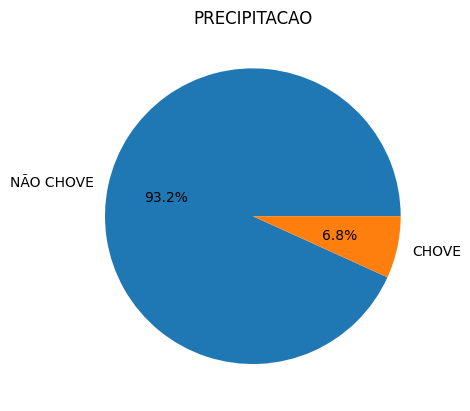

In [78]:
import matplotlib.pyplot as plt

# Count the occurrences of 'CHOVE' and 'NÃO CHOVE'
counts = concatenated_df['PRECIPITACAO'].value_counts()

# Create a pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')

# Add a title
plt.title('PRECIPITACAO')

# Display the chart
plt.show()
